In [1]:
import numpy as np
from PIL import Image
import os
#import tensorflow as tf

In [2]:
## Fınd the paths of the txt and image folders, make a pair of them 

import glob

filesimg = glob.glob('C:/Users/hakki.arkangil/Downloads/tuborg_yolov3_etiketli_veri' + '/**/*.jpg', recursive=True)
filestxt = glob.glob('C:/Users/hakki.arkangil/Downloads/tuborg_yolov3_etiketli_veri' + '/**/*.txt', recursive=True)

zipped= zip(filesimg ,filestxt)

zippath=list(zipped)

In [3]:
osn=os.path.basename(zippath[0][0])
osn

len (zippath)
zippath[378]

# osim=os.path.basename(zippath[idx][0])
# ostxt=os.path.basename(zippath[idx][1])

('C:/Users/hakki.arkangil/Downloads/tuborg_yolov3_etiketli_veri\\IMG_437311.JPG',
 'C:/Users/hakki.arkangil/Downloads/tuborg_yolov3_etiketli_veri\\IMG_437311.txt')

In [4]:
def croplabeler(idx,zippath):
    
    osim=os.path.basename(zippath[idx][0])
    ostxt=os.path.basename(zippath[idx][1])
    
    img = Image.open(osim)
    width,height= img.width, img.height

    f= open(ostxt,"r")
    annots= f.read().splitlines()

    count=0
    imgs=[]
    label=[]
    for annot in annots:
        fields = annot.split(' ')
        label.append(fields[0])
    
        annot = list(map(float,annot.split(" ")))[1:]
        x,y,w,h= annot[0] * width ,annot[1] * height, annot[2] * width ,annot[3] * height
         
        tl_x,tl_y,bt_rx,bt_ry = x-(w/2), y-(h/2) , x+(w/2) , y+(h/2)
        cropped = img.crop((tl_x,tl_y,bt_rx,bt_ry))
        cropped.save("C:/Users/hakki.arkangil/Desktop/crops/" + str(idx)+ str(count) +".jpg", 'JPEG')
        #print("my position is : " + zippath[idx][0])
        imgs.append(cropped)  #sikinti 26 lik dondurukten sonra ustuen yaziyo arrayin
        count+=1
        
        
    return imgs,label
## takes multiple object image as input and outputs each object alone

In [5]:
imgbasket=[]
labelbasket=[]
for i in range (len(zippath)):
    imgs,labels=croplabeler(i,zippath)
    imgbasket.append(imgs)
    labelbasket.append(labels)

SystemError: tile cannot extend outside image

In [6]:
flat_list_img = []
for sublist in imgbasket:
    for item in sublist:
        flat_list_img.append(item)

In [7]:
flat_list_label = []
for sublist in labelbasket:
    for item in sublist:
        flat_list_label.append(item)

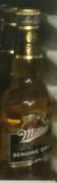

In [8]:
flat_list_img[-1]

In [9]:
flat_list_label[-1]

'36'

In [10]:
len(flat_list_img)

8251

In [11]:
len(flat_list_label)

8251

In [12]:
data = np.asarray(flat_list_img[313]) ## to understand what kind of images do we have, pixels and dimensions

In [13]:
data.shape

(201, 69, 3)

In [14]:
w,h = flat_list_img[313].width, flat_list_img[313].height

In [15]:
len(data[200]) ## 200 heightan 69 width rgb uc colorlu resim veriseti

69

In [16]:
data[200][1] #rgb formati renk degerlerini donduruyor

array([216, 204, 190], dtype=uint8)

In [17]:
###keras modeli icin veri hazirliyorum asagda

In [18]:
# kerasdata=[]

# for i in flat_list_img:
#     kk = np.asarray(i)
#     kerasdata.append(kk)



In [19]:
# M = np.empty(8, 2500, 9, 3)

# for i in range(0, M.shape[0]):
#     for j in range(0, M.shape[1]):
#         for k in range(0, M.shape[2]):
#             M[i, j, k, :] = x[i, ind[i, j, k], :]

In [20]:
########3
#########
#########                             ACTIVE   LEARNER            


import cv2
##

In [21]:
data = np.asarray(flat_list_img[313])               # test instance to be converted 1 dimension scale

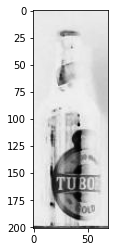

In [22]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

gray = cv2.cvtColor(np.float32(data), cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap=plt.cm.binary)

In [23]:
gray.shape                          # one dimension..

(201, 69)

In [24]:
a=cv2.resize(data,(64,200))          ### test instance to create standart data

In [25]:
flat_list_img_np=[]
for i in flat_list_img:                              ##convert images to numpy array 
    temp=np.asarray(i)
    flat_list_img_np.append(temp)

In [26]:
a=np.asarray(flat_list_img_np)

In [27]:
len(flat_list_img_np)

8251

In [28]:
flat_list_img_g=[]
for i in flat_list_img_np:
    temp=cv2.cvtColor(np.float32(i), cv2.COLOR_RGB2GRAY)           # make the numpy array one dimensional
    flat_list_img_g.append(temp) 

In [29]:
### PIL images must be array
X=[]
for i in flat_list_img_g:
    a=cv2.resize(i,(50,200))
    X.append(a)
    
    
#### height ve weighleri tek arrayde mnist gibi alinmasi gerekiyor 8x8 = 64 gibi ve 3 channel 1 ch olmali

In [30]:
#ya.reshape(8251,200,50,-1)

In [31]:
X_t=[]
for i in X:
    X_t.append(i.flatten())

In [32]:
Y=flat_list_label

In [33]:
print(len(X_t))             #succesfully paired.
print(len(Y))

8251
8251


In [34]:
Y = np.asarray(Y)

In [35]:
X_t = np.asarray(X_t)

In [36]:
##time has come for keras data

In [37]:
####

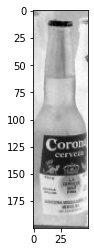

In [38]:
pixels5=X_t[75]

plt.imshow(pixels5.reshape(200, 50),cmap=plt.cm.binary)                     #we are ready for training.

In [39]:
#normalization...


def normalize2(feature): # normalization to 0-1 range
    min_feat = np.min(feature)
    max_feat = np.max(feature)
    feature = (feature - min_feat) / (max_feat-min_feat)
    return feature



In [40]:
X_t = normalize2(X_t)             #expect better accuracy with normalized dataset

In [41]:
X_t = np.asarray(X_t)

In [42]:
type(X_t)

numpy.ndarray

In [43]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [44]:
n_initial = 500

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_t, Y)

In [46]:
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)


In [47]:
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [48]:
y_train

array(['29', '49', '44', ..., '48', '17', '11'], dtype='<U2')

In [49]:
###uncertain sampling

In [50]:
learner_un = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

In [51]:
n_queries = 20

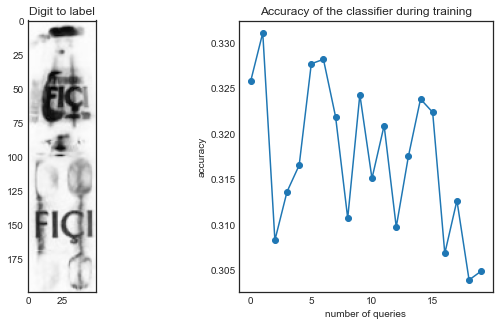

Which digit is this?


In [52]:
accuracy_scores = [learner_un.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner_un.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(200,50))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of the classifier during training')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print("Which digit is this?")
    y_new =  [2]
#     y_new = np.array([2], dtype=int)
    learner_un.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner_un.score(X_test, y_test))

In [54]:
y_test.shape

(2063,)

In [56]:
y_pool.shape

(5668,)

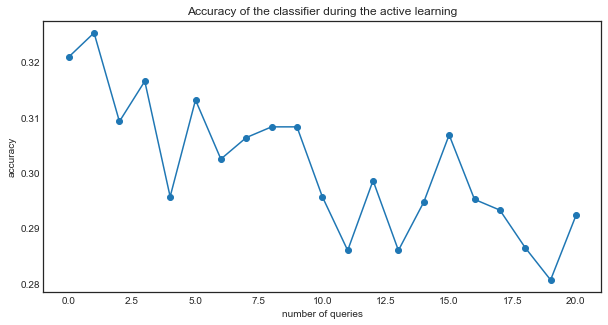

In [61]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(21), accuracy_scores)
    plt.scatter(range(21), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()                                             ## artık bu kacta durdurduysan orda plot et

In [113]:
print(accuracy_scores)

[0.31846825012118274, 0.3053805138148328, 0.3199224430441105, 0.3087736306349976, 0.31022782355792533, 0.31022782355792533, 0.30683470673776053, 0.3131362094037809, 0.31265147842947166, 0.3063499757634513, 0.3141056713523994]


In [ ]:
###                                        Random Sampling

In [62]:
#uncertainty sampling-random sampling
trial1,trial1_l=X_t[0:100],Y[0:100]
X_train, X_test, y_train, y_test = train_test_split(X_t, Y)
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [63]:
def random_sampling(classifier, X_pool):
    n_samples = len(X_pool)
    query_idx = np.random.choice(range(n_samples))
    return query_idx, X_pool[query_idx]

# initialize the learner
learner_rs = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=100, n_jobs=42),
    X_training=trial1, y_training=trial1_l, query_strategy=random_sampling
)
print('Initial prediction accuracy: %f' % learner_rs.score(X_t, Y))

Initial prediction accuracy: 0.069325


In [116]:
# learner_rand = ActiveLearner(
#     estimator=RandomForestClassifier(),
#     query_strategy=random_sampling,
#     X_training=X_initial, y_training=y_initial
# )

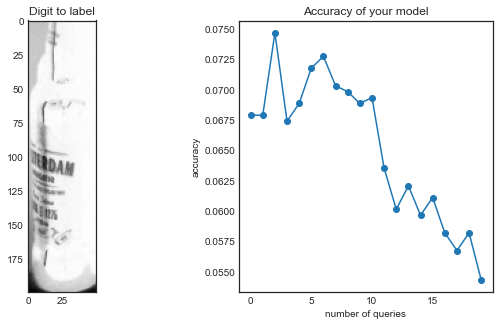

Which digit is this?


In [64]:
accuracy_scores = [learner_rs.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner_rs.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(200,50))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print("Which digit is this?")
    y_new =  [2]
    learner_rs.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner_rs.score(X_test, y_test))

In [65]:
print(accuracy_scores)

[0.06786233640329617, 0.06786233640329617, 0.07464857004362578, 0.06737760542898691, 0.06883179835191469, 0.07174018419777024, 0.07270964614638875, 0.07028599127484246, 0.0698012603005332, 0.06883179835191469, 0.06931652932622395, 0.06349975763451285, 0.060106640814348036, 0.06204556471158507, 0.059621909840038775, 0.06107610276296655, 0.058167716917111006, 0.05671352399418323, 0.058167716917111006, 0.05428986912263694, 0.050412021328162866]


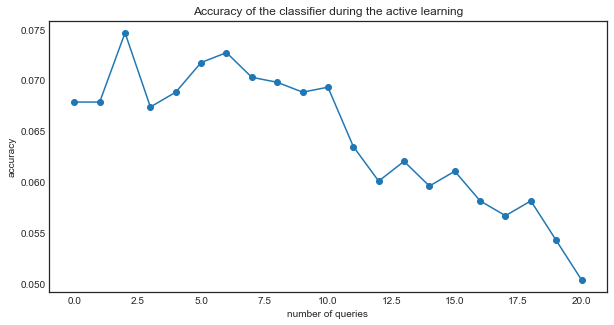

In [67]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(21), accuracy_scores)
    plt.scatter(range(21), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()      

In [68]:

##################3
##################3
##################3                       Dısagreement sampling 

In [69]:
from modAL.disagreement import consensus_entropy_sampling


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_t, Y)
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [71]:
learner_dis = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=consensus_entropy_sampling,
    X_training=X_initial, y_training=y_initial
)

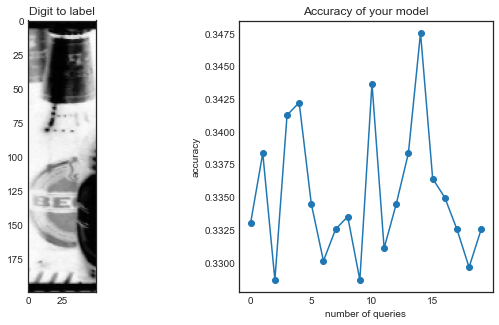

Which digit is this?


In [72]:
accuracy_scores = [learner_dis.score(X_test, y_test)]


for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner_dis.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(200,50))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print("Which digit is this?")
    y_new =  [2]
    learner_dis.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner_dis.score(X_test, y_test))

In [73]:
print(accuracy_scores)

[0.3330101793504605, 0.33834222006786235, 0.3286476005816772, 0.34125060591371786, 0.3422200678623364, 0.33446437227338827, 0.33010179350460495, 0.3325254483761512, 0.33349491032476974, 0.3286476005816772, 0.3436742607852642, 0.33107125545322347, 0.33446437227338827, 0.33834222006786235, 0.34755210857973823, 0.3364032961706253, 0.33494910324769755, 0.3325254483761512, 0.3296170625302957, 0.3325254483761512, 0.332040717401842]


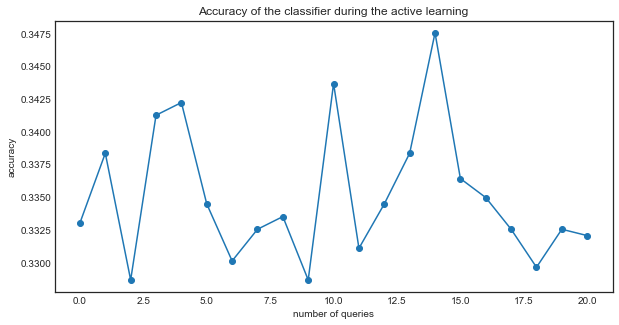

In [75]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(21), accuracy_scores)
    plt.scatter(range(21), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()      

In [126]:
from modAL.disagreement import vote_entropy_sampling

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_t, Y)
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [128]:
learner_dis2 = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=vote_entropy_sampling,
    X_training=X_initial, y_training=y_initial
)

In [130]:
# accuracy_scores = [learner_dis2.score(X_test, y_test)]


# for i in range(n_queries):
#     display.clear_output(wait=True)
#     query_idx, query_inst = learner_dis2.query(X_pool)
#     with plt.style.context('seaborn-white'):
#         plt.figure(figsize=(10, 5))
#         plt.subplot(1, 2, 1)
#         plt.title('Digit to label')
#         plt.imshow(query_inst.reshape(200,50))
#         plt.subplot(1, 2, 2)
#         plt.title('Accuracy of your model')
#         plt.plot(range(i+1), accuracy_scores)
#         plt.scatter(range(i+1), accuracy_scores)
#         plt.xlabel('number of queries')
#         plt.ylabel('accuracy')
#         display.display(plt.gcf())
#         plt.close('all')
        
#     print("Which digit is this?")
#     y_new = np.array([int(input())], dtype=int)
#     learner_dis2.teach(query_inst.reshape(1, -1), y_new)
#     X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
#     accuracy_scores.append(learner_dis2.score(X_test, y_test))



# GRAPH BASED

In [131]:
from modAL.disagreement import max_std_sampling

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_t, Y)
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [133]:
learner_dis3 = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=max_std_sampling,
    X_training=X_initial, y_training=y_initial
)

In [134]:
# accuracy_scores = [learner_dis3.score(X_test, y_test)]


# for i in range(n_queries):
#     display.clear_output(wait=True)
#     query_idx, query_inst = learner_dis3.query(X_pool)
#     with plt.style.context('seaborn-white'):
#         plt.figure(figsize=(10, 5))
#         plt.subplot(1, 2, 1)
#         plt.title('Digit to label')
#         plt.imshow(query_inst.reshape(200,50))
#         plt.subplot(1, 2, 2)
#         plt.title('Accuracy of your model')
#         plt.plot(range(i+1), accuracy_scores)
#         plt.scatter(range(i+1), accuracy_scores)
#         plt.xlabel('number of queries')
#         plt.ylabel('accuracy')
#         display.display(plt.gcf())
#         plt.close('all')
        
#     print("Which digit is this?")
#     y_new = np.array([int(input())], dtype=int)
#     learner_dis3.teach(query_inst.reshape(1, -1), y_new)
#     X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
#     accuracy_scores.append(learner_dis3.score(X_test, y_test))7


##needs improvement 

TypeError: predict() got an unexpected keyword argument 'return_std'

In [135]:
from modAL.disagreement import max_disagreement_sampling

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_t, Y)
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [137]:
learner_dis4 = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=max_disagreement_sampling,
    X_training=X_initial, y_training=y_initial
)

In [139]:
# accuracy_scores = [learner_dis4.score(X_test, y_test)]


# for i in range(n_queries):
#     display.clear_output(wait=True)
#     query_idx, query_inst = learner_dis4.query(X_pool)
#     with plt.style.context('seaborn-white'):
#         plt.figure(figsize=(10, 5))
#         plt.subplot(1, 2, 1)
#         plt.title('Digit to label')
#         plt.imshow(query_inst.reshape(200,50))
#         plt.subplot(1, 2, 2)
#         plt.title('Accuracy of your model')
#         plt.plot(range(i+1), accuracy_scores)
#         plt.scatter(range(i+1), accuracy_scores)
#         plt.xlabel('number of queries')
#         plt.ylabel('accuracy')
#         display.display(plt.gcf())
#         plt.close('all')
        
#     print("Which digit is this?")
#     y_new = np.array([int(input())], dtype=int)
#     learner_dis4.teach(query_inst.reshape(1, -1), y_new)
#     X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
#     accuracy_scores.append(learner_dis4.score(X_test, y_test))

## needs improvement

In [76]:
#####                                                                                  #####
#####                                                                                  #####
#####                                   Stream-Based                                   #####

In [86]:
from modAL.uncertainty import classifier_uncertainty
import matplotlib as mpl

#### Please note that, stream based with uncertainty sampling

In [78]:
X_full,y_full = X_t, Y

In [79]:
n_initial = 5
initial_idx = np.random.choice(range(len(X_full)), size=n_initial, replace=False)
X_train, y_train = X_full[initial_idx], y_full[initial_idx]

In [80]:
learner_stream = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train
)
unqueried_score = learner_stream.score(X_full, y_full)

print('Initial prediction accuracy: %f' % unqueried_score)

Initial prediction accuracy: 0.062901


In [85]:
# visualizing initial prediciton
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner_stream.predict_proba(X_full)[:, 0]
    plt.imshow(prediction.reshape(200, 50))
    plt.title('Initial prediction accuracy: %f' % unqueried_score)
    plt.show()

ValueError: cannot reshape array of size 8251 into shape (200,50)

<Figure size 504x504 with 0 Axes>

In [82]:
performance_history = [unqueried_score]

# learning until the accuracy reaches a given threshold
# while learner_stream.score(X_full, y_full) < 0.90:
for i in range(20):
    stream_idx = np.random.choice(range(len(X_full)))
    if classifier_uncertainty(learner_stream, X_full[stream_idx].reshape(1, -1)) >= 0.4:
        learner_stream.teach(X_full[stream_idx].reshape(1, -1), y_full[stream_idx].reshape(-1, ))
        new_score = learner_stream.score(X_full, y_full)
        performance_history.append(new_score)
        print('Pixel no. %d queried, new accuracy: %f' % (stream_idx, new_score))

Pixel no. 2632 queried, new accuracy: 0.054418
Pixel no. 3881 queried, new accuracy: 0.063386
Pixel no. 4271 queried, new accuracy: 0.069810
Pixel no. 648 queried, new accuracy: 0.082172
Pixel no. 2497 queried, new accuracy: 0.082293
Pixel no. 5183 queried, new accuracy: 0.074900
Pixel no. 6456 queried, new accuracy: 0.073688
Pixel no. 5202 queried, new accuracy: 0.092231
Pixel no. 3017 queried, new accuracy: 0.087505
Pixel no. 1522 queried, new accuracy: 0.079627
Pixel no. 4372 queried, new accuracy: 0.068598
Pixel no. 5591 queried, new accuracy: 0.068355
Pixel no. 1022 queried, new accuracy: 0.094534
Pixel no. 4495 queried, new accuracy: 0.091019
Pixel no. 3852 queried, new accuracy: 0.101079
Pixel no. 4840 queried, new accuracy: 0.094170
Pixel no. 2657 queried, new accuracy: 0.102654
Pixel no. 1337 queried, new accuracy: 0.112108
Pixel no. 4757 queried, new accuracy: 0.118167
Pixel no. 5581 queried, new accuracy: 0.117925


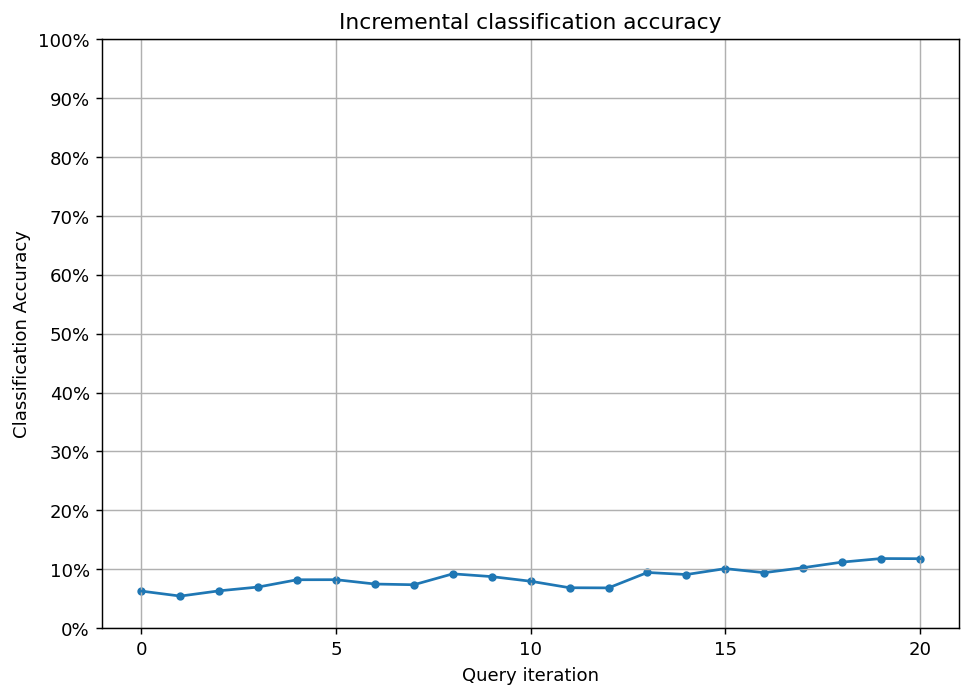

In [87]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [1]:
# import numpy as np

# # Set our RNG seed for reproducibility.
# RANDOM_STATE_SEED = 1
# np.random.seed(RANDOM_STATE_SEED) later

In [ ]:
### SVM CLASSIFIER

In [37]:
n_initial = 250

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_t, Y)
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [39]:
from sklearn.svm import LinearSVC, SVC


In [41]:
learner2 = ActiveLearner(
    estimator=SVC(C=1, kernel='linear', probability=True,
                              ),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

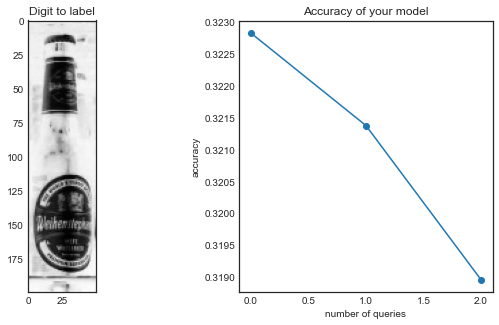

Which digit is this?


KeyboardInterrupt: Interrupted by user

In [43]:
accuracy_scores = [learner2.score(X_test, y_test)]
n_queries = 20

for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner2.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(200,50))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print("Which digit is this?")
    y_new = np.array([int(input())], dtype=int)
    learner2.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner2.score(X_test, y_test))